In [10]:
%matplotlib inline

In [11]:
from pathlib import Path
from functools import reduce

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import pandas as pd
import seaborn as sns

In [12]:
def get_tags(array, tag):
    tags = [x for x in array if x.startswith(tag)]
    return tags
    if not tags:
        tags = None
    return tags

In [13]:
def get_mentions(array):
    return get_tags(array, "@")

def get_hashtags(array):
    return get_tags(array, "#")

In [14]:
tt = TweetTokenizer()

In [15]:
stop = set(stopwords.words("english"))
punctuation = [".", ",", ";", "!"]

In [16]:
datadir = "data/twitter/socialmediadata-tweets-of-congress-november"

In [17]:
p = Path(datadir)
lst = [pd.read_json(x) for x in p.iterdir() if x.is_file()]
df = reduce(lambda x,y: x.append(y, ignore_index=True), lst)

In [18]:
df["tokens"] = df["text"].apply(lambda x: frozenset(tt.tokenize(x)))

In [19]:
df["better_tokens"] = df["tokens"].apply(lambda x: frozenset([t for t in x if t not in stop and t not in punctuation]))

In [20]:
df["mentions"] = df["tokens"].apply(lambda x: frozenset(get_mentions(x)))
df["hashtags"] = df["tokens"].apply(lambda x: frozenset(get_hashtags(x)))

In [21]:
df["num_mentions"] = df["mentions"].apply(len)
df["num_hashtags"] = df["hashtags"].apply(len)
df["word_count"] = df["better_tokens"].apply(len)
df["char_length"] = df["text"].apply(len)

In [22]:
df.head()

,id,link,screen_name,source,text,time,user_id,tokens,better_tokens,mentions,hashtags,num_mentions,num_hashtags,word_count,char_length
0,926674870183780352,https://www.twitter.com/RepScottPeters/statuse...,RepScottPeters,TweetDeck,#ICYMI: Gave @sdut a preview of my speech for ...,2017-11-04T00:58:00-04:00,1135486501,"(:, preview, a, ↓, @sdut, ', speech, @CasinaPi...","(↓, preview, @sdut, ', speech, @CasinaPioIV, h...","(@CasinaPioIV, @sdut)",(#ICYMI),2,1,13,187
1,926665267979194368,https://www.twitter.com/RepDavidYoung/statuses...,RepDavidYoung,Twitter Lite,FINAL: @VMFootball_ defeats Denver 27-6. The B...,2017-11-04T00:19:51-04:00,314205957,"(Semifinals, Denver, http://pbs.twimg.com/medi...","(FINAL, Semifinals, Congrats, Denver, 27-6, Do...",(@VMFootball_),"(#ia03, #rolldawgs)",1,2,15,179
2,926662345354567680,https://www.twitter.com/auctnr1/statuses/92666...,auctnr1,Twitter for iPhone,Truly a great time to @ExploreBranson as they ...,2017-11-04T00:08:14-04:00,21572351,"(great, a, as, http://www.ky3.com/content/news...","(great, http://www.ky3.com/content/news/Branso...",(@ExploreBranson),(),1,0,10,231
3,926661237932482560,https://www.twitter.com/GabRosenberg/statuses/...,auctnr1,Twitter for iPhone,RT @GabRosenberg Netherlands must oppose anti-...,2017-11-04T00:03:50-04:00,21572351,"(efforts, oppose, must, anti-Israel, the, http...","(efforts, oppose, must, anti-Israel, http://ww...",(@GabRosenberg),(),1,0,12,210
4,926661219083341824,https://www.twitter.com/PressSec/statuses/9265...,auctnr1,Twitter for iPhone,RT @PressSec Wheels down in Hawaii! http://pbs...,2017-11-04T00:03:45-04:00,21572351,"(!, http://pbs.twimg.com/media/DNvoVxqUQAEnFLA...",(http://pbs.twimg.com/media/DNvoVxqUQAEnFLA.jp...,(@PressSec),(),1,0,5,82


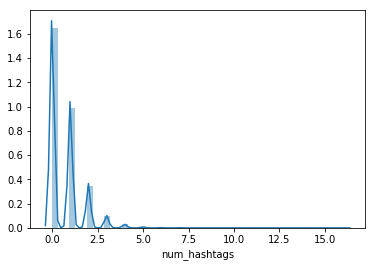

In [32]:
ax = sns.distplot(df["num_hashtags"])

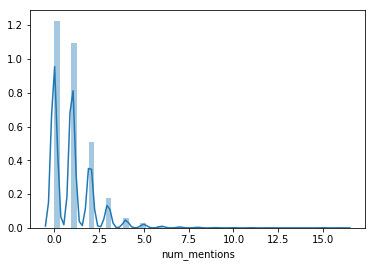

In [33]:
ax = sns.distplot(df["num_mentions"])

In [46]:
ndf = df[(df.num_mentions < 5) & (df.num_hashtags < 5)]

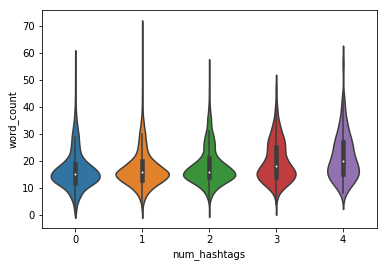

In [42]:
ax = sns.violinplot(x="num_hashtags", y="word_count", data=ndf)

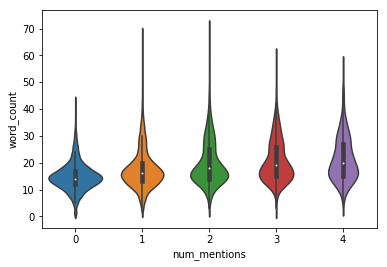

In [43]:
ax = sns.violinplot(x="num_mentions", y="word_count", data=ndf)

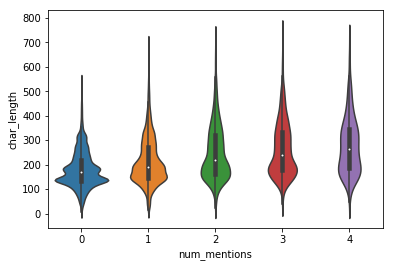

In [44]:
ax = sns.violinplot(x="num_mentions", y="char_length", data=ndf)

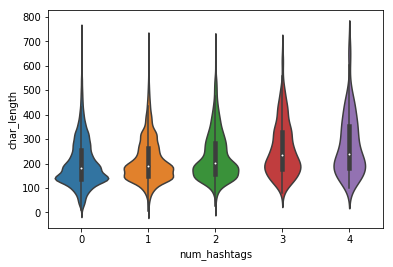

In [45]:
ax = sns.violinplot(x="num_hashtags", y="char_length", data=ndf)